In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt
prices=pd.read_excel('./上证50成分股.xlsx',header=0,index_col=0)
returns=np.log(prices/prices.shift(1))
returns=returns.dropna()
returns_17to19=returns.loc['2018-01-02':'2019-12-31']
returns_mean=returns_17to19.mean()*252
# print('股票 2018年至 2019 年的年化平均收益率\n',returns_mean.round(6))
vol=returns_17to19.std()*np.sqrt(252)
returns_cov=returns_17to19.cov()*np.sqrt(252)

In [10]:
returns_cov

,浦发银行,上海机场,民生银行,中国石化,中信证券,三一重工,招商银行,保利地产,中国联通,上汽集团,...,中国人寿,中国建筑,华泰证券,光大银行,中国石油,中国中免,中国银行,中国重工,汇顶科技,洛阳钼业
浦发银行,0.002846,0.001010,0.001851,0.001619,0.002772,0.001810,2.400654e-03,0.002610,0.001986,0.001406,...,0.002434,0.001830,0.002867,0.002063,0.001306,0.000816,0.001497,0.001511,0.001213,0.002007
上海机场,0.001010,0.007990,0.000944,0.001663,0.002663,0.002764,2.575361e-03,0.002276,0.001709,0.002411,...,0.003057,0.001623,0.002703,0.001547,0.001271,0.004999,0.001105,0.000961,0.002284,0.002406
民生银行,0.001851,0.000944,0.003182,0.001388,0.002699,0.001805,1.916645e-03,0.002773,0.002084,0.001200,...,0.002197,0.001658,0.002783,0.001787,0.001357,0.001013,0.001369,0.001808,0.001179,0.002786
中国石化,0.001619,0.001663,0.001388,0.003819,0.002624,0.001937,1.984701e-03,0.002536,0.001928,0.001720,...,0.002292,0.001854,0.002512,0.001602,0.002265,0.001475,0.001425,0.001409,0.001091,0.002295
中信证券,0.002772,0.002663,0.002699,0.002624,0.008267,0.004078,3.206182e-03,0.004662,0.004650,0.002568,...,0.004945,0.003096,0.007616,0.002558,0.002529,0.002777,0.002129,0.003687,0.003538,0.005229
三一重工,0.001810,0.002764,0.001805,0.001937,0.004078,0.006832,2.857157e-03,0.003941,0.002836,0.002126,...,0.003457,0.002412,0.004281,0.002196,0.001603,0.002326,0.001666,0.002188,0.002558,0.003121
招商银行,0.002401,0.002575,0.001917,0.001985,0.003206,0.002857,4.842169e-03,0.003993,0.001903,0.002381,...,0.003423,0.002341,0.003293,0.002680,0.001474,0.002703,0.002064,0.001255,0.001157,0.002580
保利地产,0.002610,0.002276,0.002773,0.002536,0.004662,0.003941,3.993070e-03,0.009593,0.003171,0.002195,...,0.004000,0.003338,0.004450,0.003084,0.001953,0.002768,0.002424,0.002393,0.001805,0.003899
中国联通,0.001986,0.001709,0.002084,0.001928,0.004650,0.002836,1.903313e-03,0.003171,0.007014,0.001800,...,0.003256,0.002371,0.004559,0.001848,0.001957,0.002004,0.001417,0.003448,0.003328,0.004278
上汽集团,0.001406,0.002411,0.001200,0.001720,0.002568,0.002126,2.380916e-03,0.002195,0.001800,0.005346,...,0.002322,0.001557,0.002677,0.001627,0.001212,0.002322,0.001347,0.001761,0.001644,0.002271


浦发银行 0.0
上海机场 0.056825
民生银行 0.0
中国石化 0.0
中信证券 0.0
三一重工 0.165507
招商银行 0.0
保利地产 0.0
中国联通 0.0
上汽集团 0.0
复星医药 0.0
恒瑞医药 0.0
万华化学 0.0
贵州茅台 0.0
山东黄金 0.0
海螺水泥 0.136928
用友网络 0.0
海尔智家 0.0
三安光电 0.0
闻泰科技 0.297458
海通证券 0.0
伊利股份 0.0
隆基股份 0.0
中国神华 0.0
兴业银行 0.0
中国铁建 0.0
国泰君安 0.0
农业银行 0.0
中国平安 0.0
交通银行 0.0
新华保险 0.0
工商银行 0.0
中国太保 0.0
中国人寿 0.0
中国建筑 0.0
华泰证券 0.0
光大银行 0.0
中国石油 0.0
中国中免 0.270986
中国银行 0.0
中国重工 0.0
汇顶科技 0.072296
洛阳钼业 0.0
   浦发银行      上海机场  民生银行  中国石化  中信证券      三一重工  招商银行  保利地产  中国联通  上汽集团  ...  \
0   0.0  0.056825   0.0   0.0   0.0  0.165507   0.0   0.0   0.0   0.0  ...   

   中国人寿  中国建筑  华泰证券  光大银行  中国石油      中国中免  中国银行  中国重工      汇顶科技  洛阳钼业  
0   0.0   0.0   0.0   0.0   0.0  0.270986   0.0   0.0  0.072296   0.0  

[1 rows x 43 columns]


/Users/flybird/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


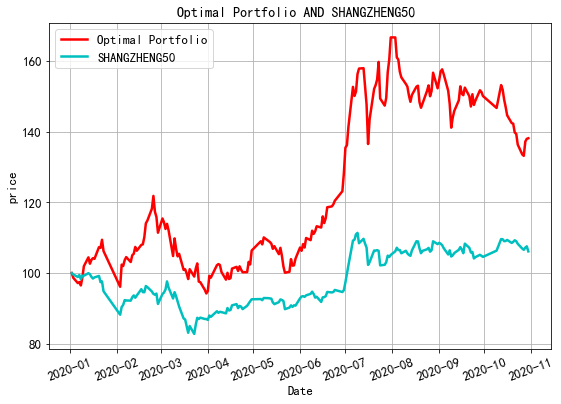

In [11]:
def F(w):
    Rf = 0.02
    w = np.array(w)
    Rp = np.sum(w * returns_mean)
    Vp = np.sqrt(np.dot(w, np.dot(returns_cov, w.T)))
    SR = (Rp - Rf) / Vp
    return np.array([Rp, Vp, SR])
def SRmin_F(w):
    return -F(w)[2]
cons=({'type':'eq','fun':lambda x: np.sum(x)-1})
bnds=tuple((0,1) for x in range(len(returns_mean)))
w0=np.ones_like(returns_mean)/len(returns_mean)
result=sco.minimize(SRmin_F,w0,method='SLSQP',bounds=bnds,constraints=cons)

weight=result['x']
stock_name=returns_mean.index
# 公司名称与权重一一对应,并且读入字典
profolio = dict()
for i in range(len(returns_mean)):
    print(stock_name[i],round(weight[i],6))
    profolio[stock_name[i]] = [round(weight[i],6)]

#得出权重组合配对
weight_df = pd.DataFrame.from_dict(profolio)
print(weight_df)

#读取上证50成份2020
prices_20 = pd.read_excel('./上证50成份2020.xlsx', sheet_name="Sheet1", header=0, index_col=0)
#读取上证50指数2020
Index_20 = pd.read_excel('./上证50指数2020.xlsx', sheet_name="Sheet1", header=0, index_col=0)
Index_20 = 100 * (Index_20 / Index_20.iloc[0])
prices_20=prices_20[weight_df.columns].loc['2020-01-02':'2020-10-30']
port_price_20=100*np.sum(weight*prices_20/prices_20.iloc[0],axis=1)
plt.figure(figsize=(9,6))
plt.plot(port_price_20,'r-',label=u'Optimal Portfolio',lw=2.5)
plt.plot(Index_20,'c-',label=u'SHANGZHENG50',lw=2.5)
plt.xlabel(u'Date',fontsize=13)
plt.xticks(fontsize=13,rotation=20)
plt.ylabel(u'price',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'Optimal Portfolio AND SHANGZHENG50 ', fontsize=14)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()

In [142]:
prices_20 = pd.read_excel('./上证50成份2020.xlsx', sheet_name="Sheet1", header=0, index_col=0)

In [143]:
prices_20 = prices_20[need_columns]

In [144]:
port_price_20=100*np.sum(weight*prices_20/prices_20.iloc[0],axis=1)

In [146]:
port_price_20

2020-01-02 00:00:00    0.0
2020-01-03 00:00:00    0.0
2020-01-06 00:00:00    0.0
2020-01-07 00:00:00    0.0
2020-01-08 00:00:00    0.0
                      ... 
2020-10-27 00:00:00    0.0
2020-10-28 00:00:00    0.0
2020-10-29 00:00:00    0.0
2020-10-30 00:00:00    0.0
0                      0.0
Length: 200, dtype: float64

In [149]:
plt.figure(figsize=(9,6))
# plt.plot(port_price_20,'r-',label=u'Optimal Portfolio',lw=2.5)
# plt.plot(Index_20,'c-',label=u'SHANGZHENG50',lw=2.5)
# plt.xlabel(u'Date',fontsize=13)
# plt.xticks(fontsize=13,rotation=20)
# plt.ylabel(u'price',fontsize=13)
# plt.yticks(fontsize=13)
# plt.title(u'Optimal Portfolio AND SHANGZHENG50 ', fontsize=14)
# plt.legend(fontsize=13)
# plt.grid('True')
# plt.show()

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>